# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [ ]:
# WRITE YOUR CODE HERE
set.seed(15)
n <- 100
X <- rnorm(n)
epsilon <- rnorm(n)
beta_0 <- 2
beta_1 <- 3
beta_2 <- -1
beta_3 <- -2

Y <- beta_0 + beta_1*X + beta_2*X^2 + beta_3*X^3 + epsilon

data <- data.frame(Y = Y, X = X)


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [ ]:
library(tidyverse)
install.packages('leaps')
library(leaps)

data_expanded <- data.frame(Y = Y, X = X, X2 = X^2, X3 = X^3, X4 = X^4, X5 = X^5,
                           X6 = X^6, X7 = X^7, X8 = X^8, X9 = X^9, X10 = X^10)
best_subset <- regsubsets(Y ~ ., data = data_expanded, nvmax = 10)
best_subset_summary <- summary(best_subset)
print(best_subset_summary)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Subset selection object
Call: regsubsets.formula(Y ~ ., data = data_expanded, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " "
2  ( 1 )  " " " " " " "*" "*" " " " " " " " " " "
3  ( 1 )  "*" " " "*" "*" " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 )  "*" "*" " " "*" "*" " " "*" " " "*" " "
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

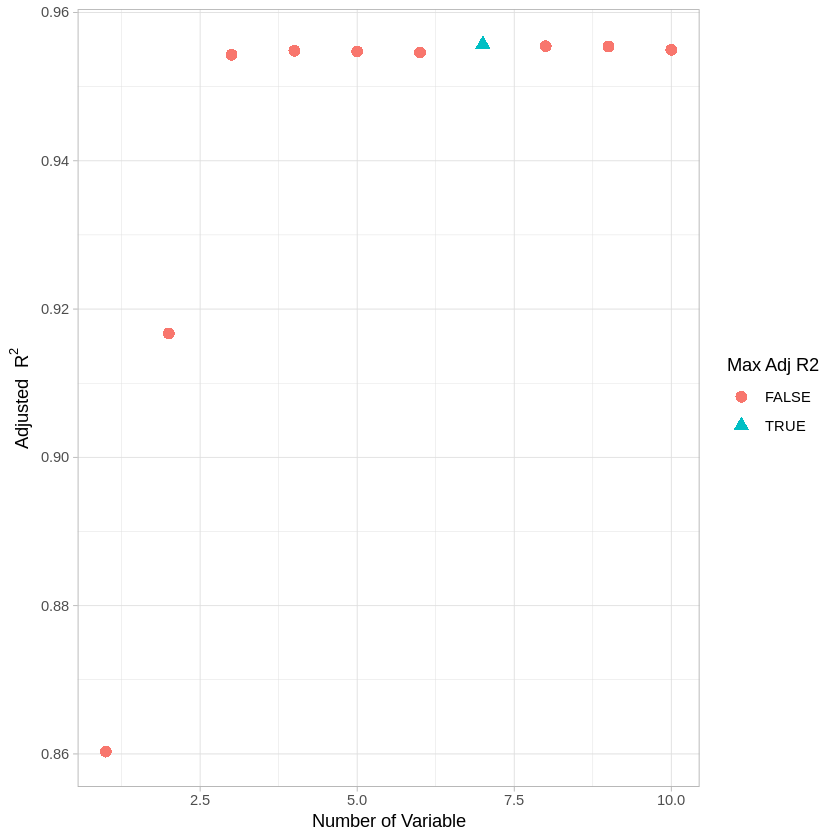

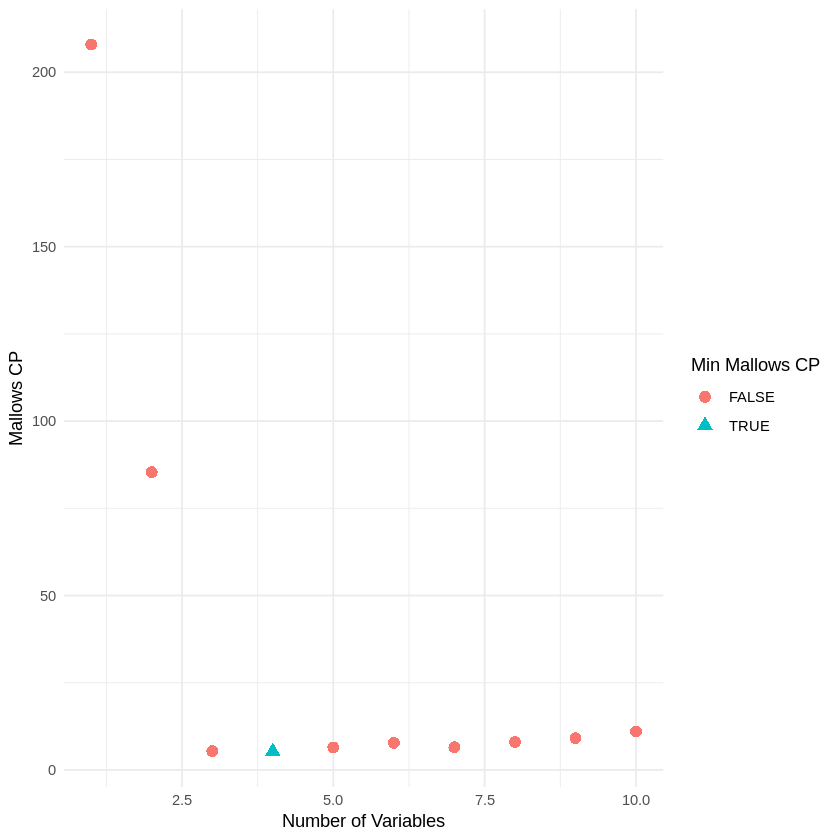

[1] "Best adjR2: 7 | Best Cp: 4 | Best BIC: 3"
[1] "BIC Coefficients: 1.38085421905167"  
[2] "BIC Coefficients: 3.0090538724292"   
[3] "BIC Coefficients: -2.00145168803188" 
[4] "BIC Coefficients: -0.185734664534502"


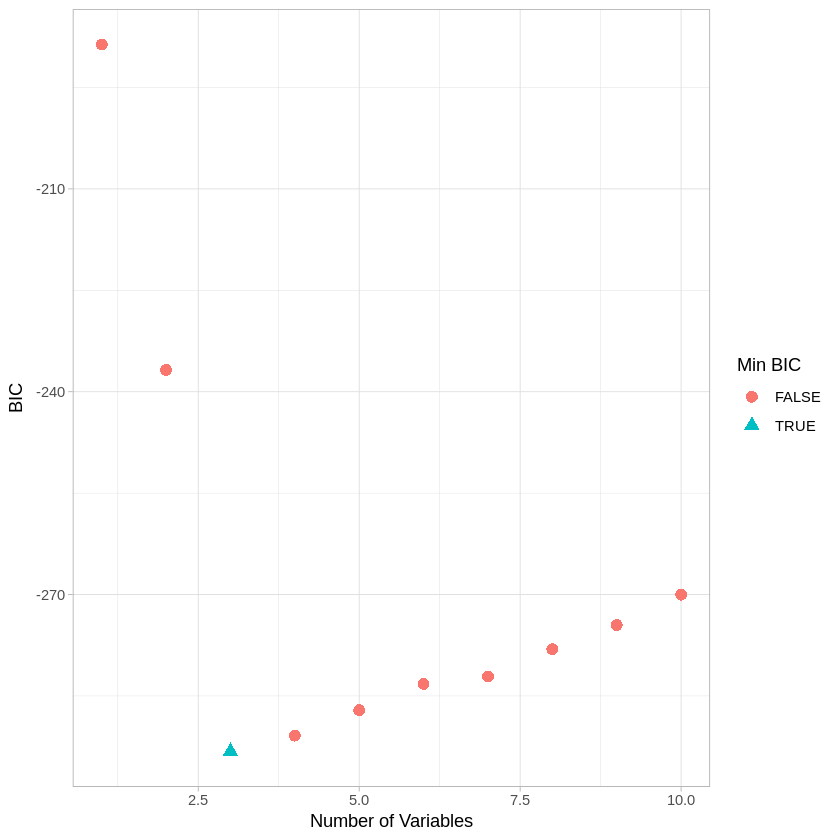

In [ ]:
library(ggplot2)

numvar <- 1:length(best_subset_summary$adjr2)
allfalse <- rep(FALSE, length(best_subset_summary$adjr2))

adjr2.df <- data.frame(numvar = numvar, adjr2 = best_subset_summary$adjr2, maxadjr2 = allfalse)
adjr2.df$maxadjr2[which.max(best_subset_summary$adjr2)] <- TRUE
ggplot(adjr2.df, aes(x = numvar, y = adjr2, shape = maxadjr2, color = maxadjr2)) +
  geom_point(size = 3) +
  theme_light() +
  labs(x = 'Number of Variable',
       y = expression(Adjusted ~ R^2),
       color = 'Max Adj R2',
       shape = 'Max Adj R2')


cp.df <- data.frame(numvar = numvar, cp = best_subset_summary$cp, mincp = allfalse)
cp.df$mincp[which.min(best_subset_summary$cp)] <- TRUE
ggplot(cp.df, aes(x = numvar, y = cp, shape = mincp, color = mincp)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = 'Number of Variables',
       y = 'Mallows CP',
       color = 'Min Mallows CP',
       shape = 'Min Mallows CP')

bic.df <- data.frame(numvar = numvar, bic = best_subset_summary$bic, minbic = allfalse)
bic.df$minbic[which.min(best_subset_summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) +
       theme_light() +
         labs(x = 'Number of Variables',
         y = 'BIC',
         color='Min BIC', shape='Min BIC')


best_adjr2 <- which.max(best_subset_summary$adjr2)
best_cp <- which.min(best_subset_summary$cp)
best_bic <- which.min(best_subset_summary$bic)
print(paste('Best adjR2:', best_adjr2,
            '| Best Cp:', best_cp,
            '| Best BIC:', best_bic))
bic_coef <- coef(best_subset, best_bic)
print(paste('BIC Coefficients:',bic_coef))

> *Write your response here*
> best model = BIC, coefficients:
[1] "BIC Coefficients: 1.38085421905167"  
[2] "BIC Coefficients: 3.0090538724292"   
[3] "BIC Coefficients: -2.00145168803188"
[4] "BIC Coefficients: -0.185734664534502"

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

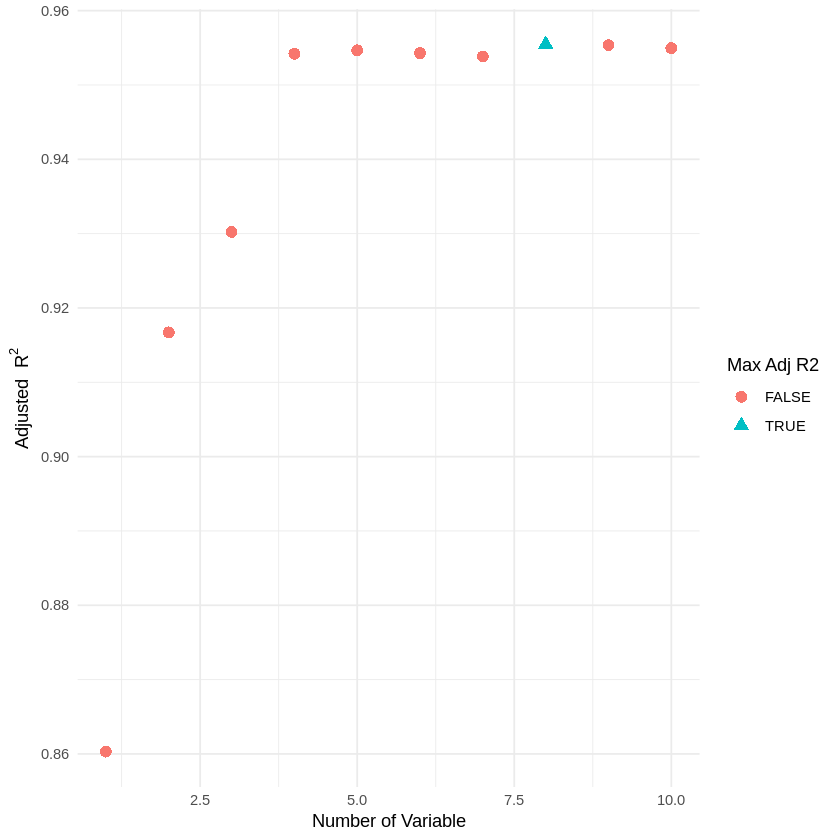

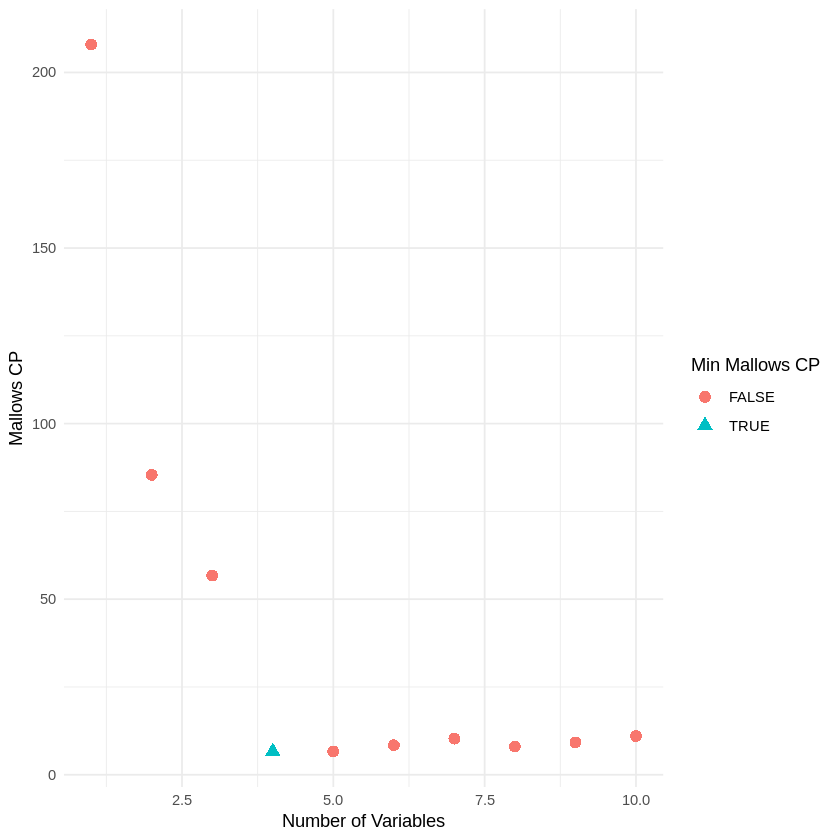

[1] 8
[1] 4
[1] 4
[1] "Forward BIC Coefficients: 1.37274301807414"   
[2] "Forward BIC Coefficients: 2.7838196291021"    
[3] "Forward BIC Coefficients: -1.78598449944926"  
[4] "Forward BIC Coefficients: -0.185890078983576" 
[5] "Forward BIC Coefficients: -0.0328761779660638"


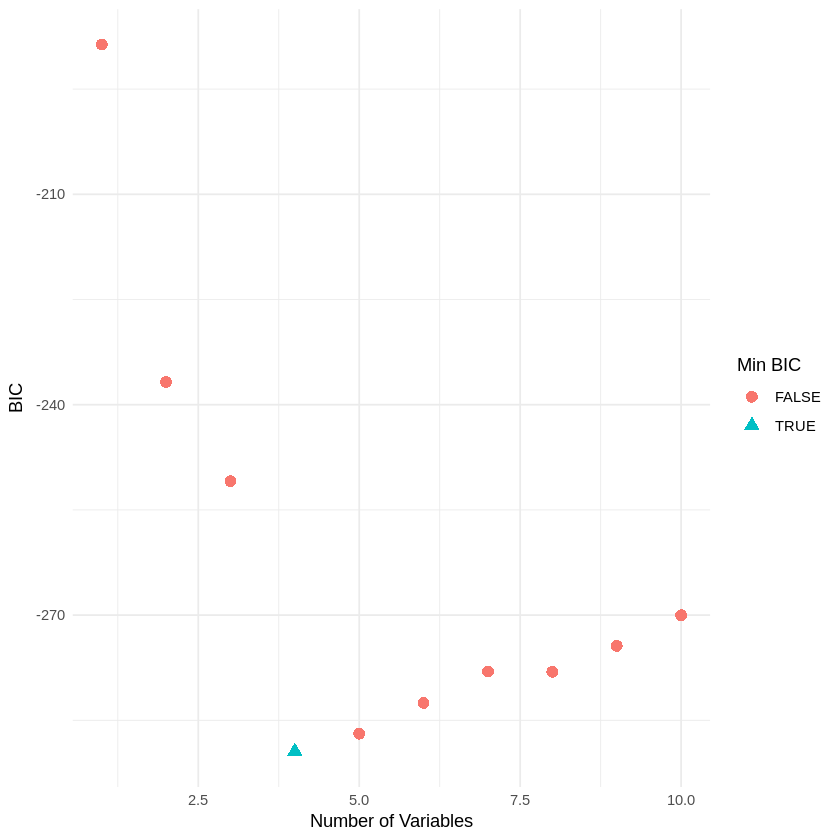

In [ ]:
forward_fit <- regsubsets(Y ~ ., data = data_expanded, nvmax = 10, method = 'forward')
forward_summary <- summary(forward_fit)

forward_adjr2 <- which.max(forward_summary$adjr2)
forward_cp    <- which.min(forward_summary$cp)
forward_bic   <- which.min(forward_summary$bic)


numvar <- 1:length(forward_summary$adjr2)
allfalse <- rep(FALSE, length(forward_summary$adjr2))

forward_adjr2.df <- data.frame(numvar = numvar, adjr2 = forward_summary$adjr2, maxadjr2 = allfalse)
forward_adjr2.df$maxadjr2[which.max(forward_summary$adjr2)] <- TRUE
ggplot(forward_adjr2.df, aes(x = numvar, y = adjr2, shape = maxadjr2, color = maxadjr2)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = 'Number of Variable',
       y = expression(Adjusted ~ R^2),
       color = 'Max Adj R2',
       shape = 'Max Adj R2')


forward_cp.df <- data.frame(numvar = numvar, cp = forward_summary$cp, mincp = allfalse)
forward_cp.df$mincp[which.min(forward_summary$cp)] <- TRUE
ggplot(forward_cp.df, aes(x = numvar, y = cp, shape = mincp, color = mincp)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = 'Number of Variables',
       y = 'Mallows CP',
       color = 'Min Mallows CP',
       shape = 'Min Mallows CP')

forward_bic.df <- data.frame(numvar = numvar, bic = forward_summary$bic, minbic = allfalse)
forward_bic.df$minbic[which.min(forward_summary$bic)] <- TRUE
ggplot(forward_bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
     geom_point(size=3) +
       theme_minimal() +
         labs(x = 'Number of Variables',
         y = 'BIC',
         color='Min BIC', shape='Min BIC')


print(forward_adjr2)
print(forward_cp)
print(forward_bic)

forward_bic_coef <- coef(forward_fit, forward_bic)
print(paste('Forward BIC Coefficients:',forward_bic_coef))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

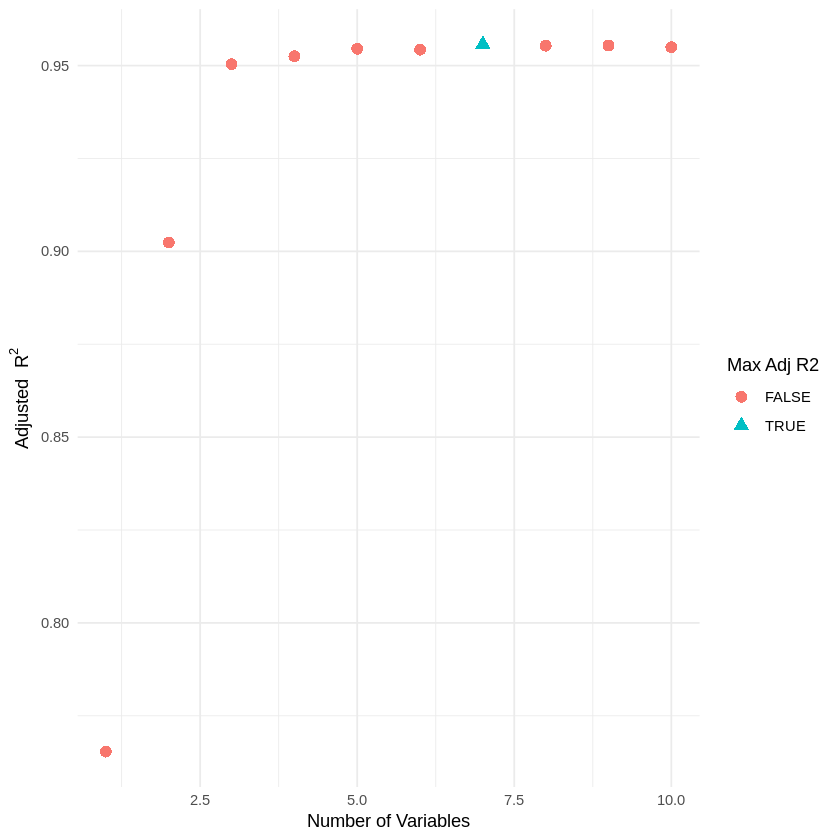

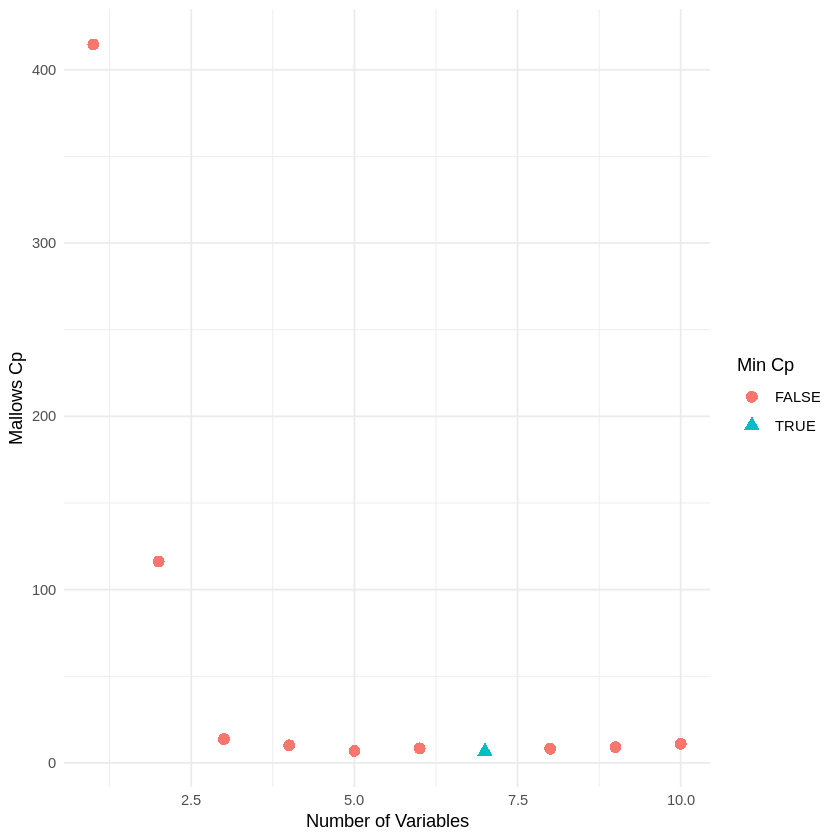

[1] 7
[1] 7
[1] 5
[1] "Backward BIC Coefficients: 1.42992687127256"   
[2] "Backward BIC Coefficients: 3.02340378062139"   
[3] "Backward BIC Coefficients: -2.00514952158669"  
[4] "Backward BIC Coefficients: -0.277900703372278" 
[5] "Backward BIC Coefficients: 0.0903191274814746" 
[6] "Backward BIC Coefficients: -0.0081845228070459"


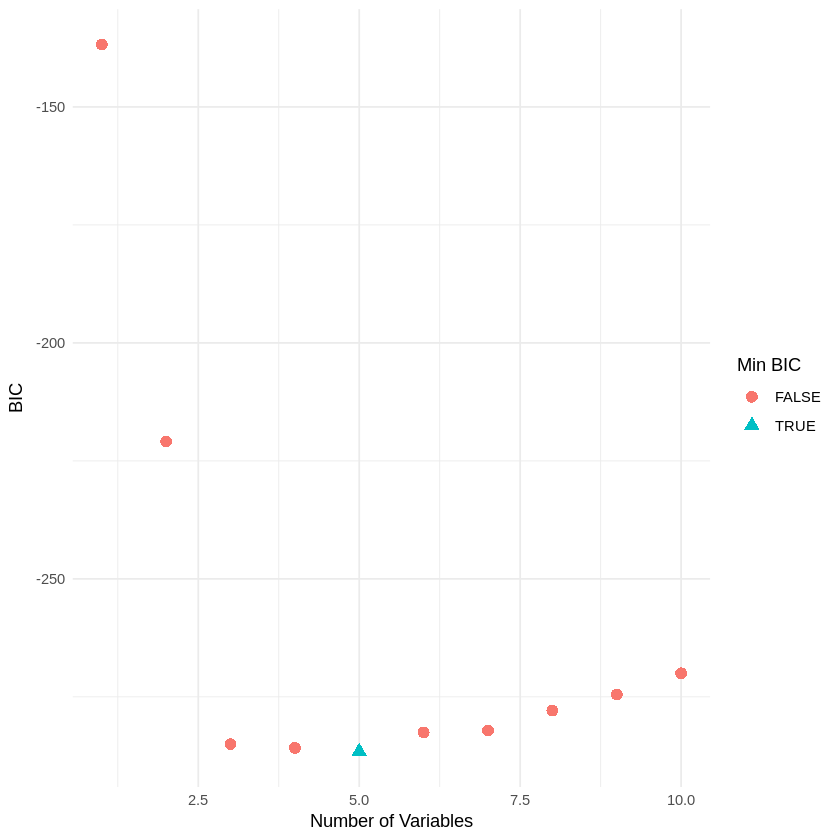

In [ ]:

backward_fit <- regsubsets(Y ~ ., data = data_expanded, nvmax = 10, method = 'backward')
backward_summary <- summary(backward_fit)

backward_adjr2 <- which.max(backward_summary$adjr2)
backward_cp    <- which.min(backward_summary$cp)
backward_bic   <- which.min(backward_summary$bic)

numvar <- 1:length(backward_summary$adjr2)
allfalse <- rep(FALSE, length(backward_summary$adjr2))

backward_adjr2.df <- data.frame(numvar = numvar, adjr2 = backward_summary$adjr2, maxadjr2 = allfalse)
backward_adjr2.df$maxadjr2[backward_adjr2] <- TRUE
ggplot(backward_adjr2.df, aes(x = numvar, y = adjr2, shape = maxadjr2, color = maxadjr2)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = 'Number of Variables',
       y = expression(Adjusted ~ R^2),
       color = 'Max Adj R2',
       shape = 'Max Adj R2')


backward_cp.df <- data.frame(numvar = numvar, cp = backward_summary$cp, mincp = allfalse)
backward_cp.df$mincp[backward_cp] <- TRUE
ggplot(backward_cp.df, aes(x = numvar, y = cp, shape = mincp, color = mincp)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = 'Number of Variables',
       y = 'Mallows Cp',
       color = 'Min Cp',
       shape = 'Min Cp')

backward_bic.df <- data.frame(numvar = numvar, bic = backward_summary$bic, minbic = allfalse)
backward_bic.df$minbic[backward_bic] <- TRUE
ggplot(backward_bic.df, aes(x = numvar, y = bic, shape = minbic, color = minbic)) +
  geom_point(size = 3) +
  theme_minimal() +
  labs(x = 'Number of Variables',
       y = 'BIC',
       color = 'Min BIC',
       shape = 'Min BIC')


print(backward_adjr2)
print(backward_cp)
print(backward_bic)

backward_bic_coef <- coef(backward_fit, backward_bic)
print(paste('Backward BIC Coefficients:',backward_bic_coef))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> a and b (forward and backward) have 2more variables with very small coefficients so they are probably not necessary but all three results included intercept, X3 and X4 so they are probably important. Question 1 BIC = best model overall.
>1. [1] "Best adjR2: 7 | Best Cp: 4 | Best BIC: 3"
[1] "BIC Coefficients: 1.38085421905167"  
[2] "BIC Coefficients: 3.0090538724292"   
[3] "BIC Coefficients: -2.00145168803188"
[4] "BIC Coefficients: -0.185734664534502"

> a. forward 8
[1] 4
[1] 4
[1] "Forward BIC Coefficients: 1.37274301807414"   
[2] "Forward BIC Coefficients: 2.7838196291021"    
[3] "Forward BIC Coefficients: -1.78598449944926"  
[4] "Forward BIC Coefficients: -0.185890078983576"
[5] "Forward BIC Coefficients: -0.0328761779660638"

> b. backward 7
[1] 7
[1] 5
[1] "Backward BIC Coefficients: 1.42992687127256"   
[2] "Backward BIC Coefficients: 3.02340378062139"   
[3] "Backward BIC Coefficients: -2.00514952158669"  
[4] "Backward BIC Coefficients: -0.277900703372278"
[5] "Backward BIC Coefficients: 0.0903191274814746"
[6] "Backward BIC Coefficients: -0.0081845228070459"

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [24]:
set.seed(123)

n <- 1000
p <- 20
X <- matrix(rnorm(n * p), nrow = n, ncol = p)
beta <- c(runif(5, -2, 2), rep(0, p - 5))
epsilon <- rnorm(n)
Y <- X %*% beta + epsilon

data <- data.frame(Y = Y, X)

train_indices <- 1:100
test_indices <- 101:1000

train_data <- data[train_indices, ]
test_data <- data[test_indices, ]


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

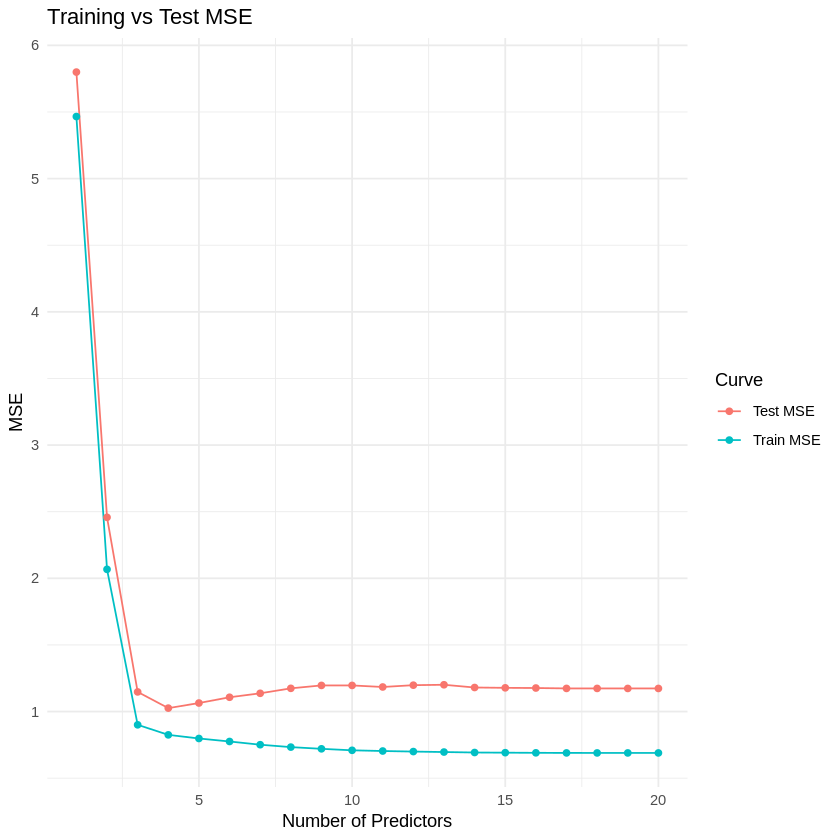

In [27]:
subset_fit <- regsubsets(Y ~ ., data = train_data, nvmax = 20)
subset_summary <- summary(subset_fit)

train_mse <- rep(NA, 20)
test_mse <- rep(NA, 20)


for (i in 1:20) {
  model_coef <- coef(subset_fit, id = i)
  model_vars <- names(model_coef)[-1]

  formula_str <- paste("Y ~", paste(model_vars, collapse = " + "))
  formula <- as.formula(formula_str)

  model_fit <- lm(formula, data = train_data)

  train_pred <- predict(model_fit, newdata = train_data)
  test_pred <- predict(model_fit, newdata = test_data)

  train_mse[i] <- mean((train_data$Y - train_pred)^2)
  test_mse[i]  <- mean((test_data$Y - test_pred)^2)
}

mse_df <- data.frame(
  ModelSize = 1:20,
  Train = train_mse,
  Test = test_mse
)
ggplot(mse_df, aes(x = ModelSize)) +
  geom_line(aes(y = Train, color = 'Train MSE')) +
  geom_line(aes(y = Test, color = 'Test MSE')) +
  geom_point(aes(y = Train, color = 'Train MSE')) +
  geom_point(aes(y = Test, color = 'Test MSE')) +
  labs(title = 'Training vs Test MSE',
       x = 'Number of Predictors',
       y = 'MSE',
       color = 'Curve') +
  theme_minimal()

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [28]:
which.min(test_mse)


[1] 4

> *Write your response here*
> the actual model had 5 predictors and this model has 4.

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*